In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
from IPython.display import display, HTML

HTML("""
<style>
.mid {color: #000000; 
font-size: 14px; 
font-stretch: ultra-expanded;
padding: 24px; 
background-color: #f9f9f9; 
line-height: 22px; 
box-shadow: 20px 0px #96c93b;
}

.starter {
color: #000000; 
font-size: 14px; 
font-stretch: ultra-expanded; 
padding: 24px; 
background-color: #f9f9f9; 
line-height: 22px; 
box-shadow: 20px -10px #ff9797;
}

.header2 {
color: #000000; 
font-size: 20px; 
font-stretch: ultra-expanded; 
padding: 24px; 
line-height: 22px; 
box-shadow: 20px -10px #96c93b;
}

.footer {
color: #000000; 
font-size: 14px; 
font-stretch: ultra-expanded; 
padding: 24px; 
background-color: #f9f9f9; 
line-height: 22px; 
box-shadow: -16px 16px #96c93b
}

</style>
""")

<div style="text-align: center;"><img src="https://i.imgur.com/ByXfpAC.png">

<div style="color: #000000; font-size: 55px; font-family: Georgia; padding: 24px; font-stretch: expanded; background-color: #ffffff; line-height: 50px; border-radius: 10px 100px / 120px; text-align: center; border: 0px dotted black;">Obesity Risk Prediction</div>

# <b><span style='color: #96c93b'>1 |</span> First Look</b>

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

display(df_train.head())
display(df_test.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


<div class="starter">Let's dive into this dataset and explore the potential it holds for predicting obesity risk.<BR><BR>

The dataset comprises 17 features, ranging from personal information like age and weight to lifestyle habits like physical activity and technology usage. The target variable, NObeyesdad, represents the categorized obesity risk level for each individual.</div>

<div class="mid"><span style="text-shadow: 0px 0px 5px #ff9797, 0px 0px 10px #ff9797, 0px 0px 10px #ff9797,
    0px 0px 20px #ff9797;"><b>Exploring the Features</b></span>

<ul>
  <li><b>id</b>: A unique identifier for each individual</li>
  <li><b>Gender</b>: Indicates whether the individual is male or female</li>
  <li><b>Age</b>: The age of the individual</li>
  <li><b>Height</b>: The height of the individual in centimeters</li>
  <li><b>Weight</b>: The weight of the individual in kilograms</li>
  <li><b>family_history_with_overweight</b>: Indicates whether the individual has a family history of obesity</li>
  <li><b>FAVC</b>: Frequency of consumption of high caloric food</li>
  <li><b>FCVC</b>: Frequency of consumption of vegetables</li>
  <li><b>NCP</b>: Number of main meals</li>
  <li><b>CAEC</b>: Consumption of food between meals</li>
  <li><b>SMOKE</b>: Smoking status</li>
  <li><b>CH2O</b>: Consumption of water daily</li>
  <li><b>SCC</b>: Calories consumption monitoring</li>
  <li><b>FAF</b>: Physical activity frequency</li>
  <li><b>TUE</b>: Time using technology devices</li>
  <li><b>CALC</b>: Consumption of alcohol</li>
  <li><b>MTRANS</b>: Transportation used</li>
</ul></div>

<div class="mid"><span style="text-shadow: 0px 0px 5px #96c93b, 0px 0px 10px #96c93b, 0px 0px 10px #96c93b,
    0px 0px 20px #96c93b;"><b>Potential for Feature Engineering</b></span><BR><BR>

The dataset provides a wealth of information for exploring the relationship between various factors and obesity risk. Here are some potential features we can engineer:

&bull; <b>BMI (Body Mass Index)</b>: Calculate BMI by dividing weight (kg) by height squared (m²).

&bull; <b>Dietary diversity</b>: Instead of just having two separate variables for high caloric food and veggies, create a single variable that represents the relative frequency of consumption of these two types of food. This could be done by calculating the ratio of high-caloric food consumption to vegetable consumption. Another suggestion of the feature name: "Balanced diet index".
    
&bull; <b>Total number of meals</b>: Instead of just having two separate variables for the number of main meals and the consumption of food between meals, create a single variable that represents the overall eating pattern of the individual. This could be done by calculating the total number of meals and snacks that the individual consumes per day.

&bull; <b>Physical Activity Index</b>: Combine physical activity frequency and transportation to assess overall physical activity levels. We can include Time using technology here, as well.
    
&bull; <b>Physical Activity Level (PAL)</b> - from Wikipedia, it's used to express a person's daily physical activity as a number, and is used to estimate a person's total energy expenditure (TEE). In combination with the basal metabolic rate (BMR), it can be used to compute the amount of food energy a person needs to consume in order to maintain a particular lifestyle. Formula for PAL is TEE in a 24-hour period, divided by BMR. There are few columns we can use to estimate both the TEE and BMR. 

<BR><BR>
Also, there are some features we can make groups from:<BR><BR>
&bull; <b>Age Category</b>: group individuals into different age categories (e.g., 18-24, 25-34, 35-44, etc.)

&bull; <b>Height Category</b> to group individuals into different height categories (e.g., short, medium, tall)


By incorporating these engineered features, we can potentially enhance the predictive power of our models and better understand the underlying factors contributing to obesity.

# <b><span style='color: #96c93b'>2 |</span> Data Preparation and Cleaning</b>



<div class="header2"><span style=""><b>2.1 | Missing values</b></span></div>

In [4]:
print('Train: ')
print(df_train.isnull().sum())
print('\n')
print('Test: ')
print(df_test.isnull().sum())

Train: 
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Test: 
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               

<div class="footer">✅ There are no missing values in the dataset.</div>

<div class="header2"><span style=""><b>2.2 | Outliers</b></span></div>

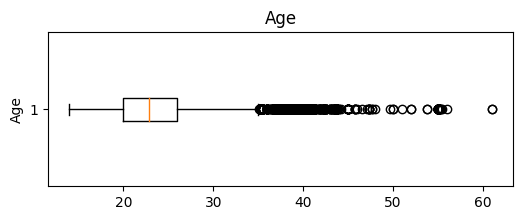

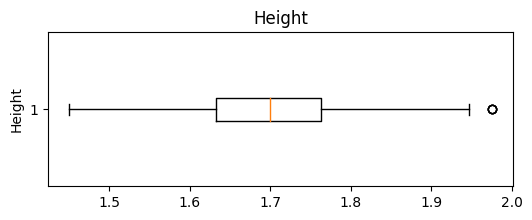

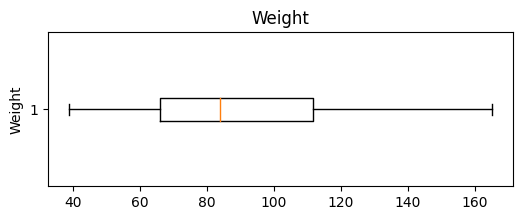

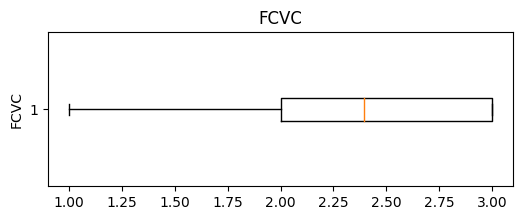

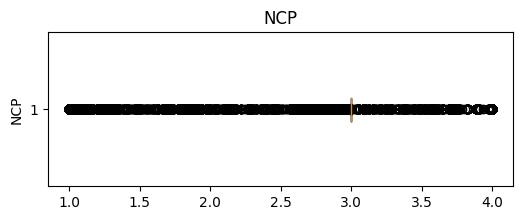

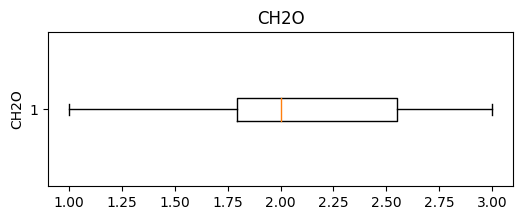

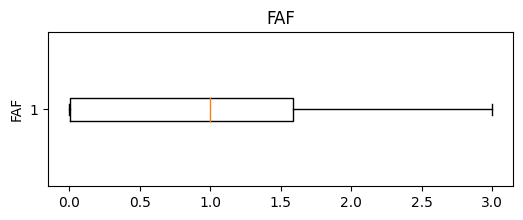

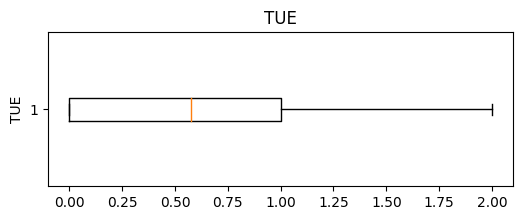

In [5]:
# Filter numerical features
numerical_columns = df_train.select_dtypes(include=['float64', 'int64'])

# Create box plots for each feature
for idx, col in enumerate(numerical_columns.columns[1:]):
    plt.figure(figsize=(6, 2))
    plt.boxplot(df_train[col], vert=False)
    plt.title(col)
#     plt.xlabel('Value')
    plt.ylabel(col)
    plt.show()

<div class="mid">

📌 We can see that the majority of numerical features is free of outliers.<BR>
    📌 Most outliers are in the <code>Age</code> feature. Further analysis is needed.<BR>
    📌 Something weird is happening in the <code>NCP</code> feature. Further analysis is needed.<BR>
    📌 <code>Height</code> has an outlier but I think we can leave it.

</div>

<div class="mid" style="border-top: 2px dotted black;"><span style="text-shadow: 0px 0px 5px #96c93b, 0px 0px 10px #96c93b, 0px 0px 10px #96c93b,
    0px 0px 20px #96c93b;"><b>Age distribution</b></span><BR><BR>

As spotted above, <code>Age</code> distribution analysis is needed.<BR>
As we see in the boxplot, the median age is around 23, with the middle 50% of data ranging from around 20 to 26.<BR>
The distribution of age appears to be right skewed, meaning there are more younger individuals than older individuals.<BR>
There are many outliers on the older end of the distribution, starting from 35. This means we don't have a lot of older people in this dataset.</div>

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

Age
18.000000    0.092302
26.000000    0.087003
21.000000    0.079150
23.000000    0.057905
19.000000    0.042682
               ...   
18.868167    0.000048
29.483056    0.000048
19.726948    0.000048
38.392569    0.000048
17.288205    0.000048
Name: proportion, Length: 1703, dtype: float64


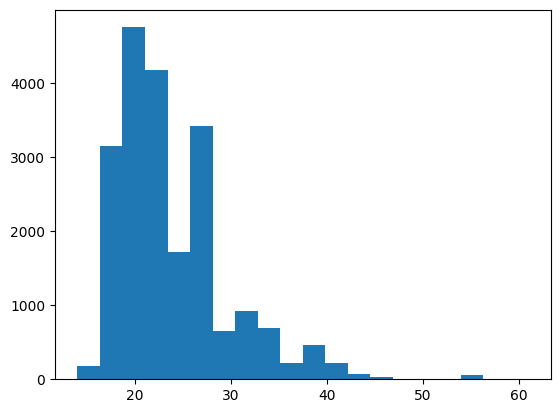

In [6]:
plt.hist(df_train.Age, bins=20);

display(df_train.Age.describe())
print(df_train.Age.value_counts(normalize=True))

In [7]:
# Helper function
def check_outliers(column, dataframe):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[~((dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound))]

    # Analyze outlier characteristics
    print('Summary statistics for outliers of ' + column + '\n')
    display(outliers.describe())

    # Visualize outlier distribution
    plt.figure(figsize=(8, 6))
    plt.hist(outliers[column])
    plt.title("Distribution of Outliers in " + column)
    plt.show()

Summary statistics for outliers of Age



,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,10339.790503,40.129769,1.648013,85.624993,2.293739,2.637243,1.785384,0.714547,0.152276
std,6064.654905,4.524898,0.094154,16.206182,0.415608,0.711822,0.590902,0.826168,0.404536
min,25.000000,35.125401,1.450000,45.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5117.250000,37.638102,1.560000,77.550345,2.000000,2.812283,1.063621,0.000000,0.000000
50%,10080.000000,38.702213,1.650000,80.000000,2.000000,3.000000,1.972016,0.591068,0.000000
75%,15728.250000,40.967653,1.749080,90.000000,2.733913,3.000000,2.000000,1.000000,0.000000
max,20752.000000,61.000000,1.910000,121.889803,3.000000,4.000000,3.000000,3.000000,2.000000


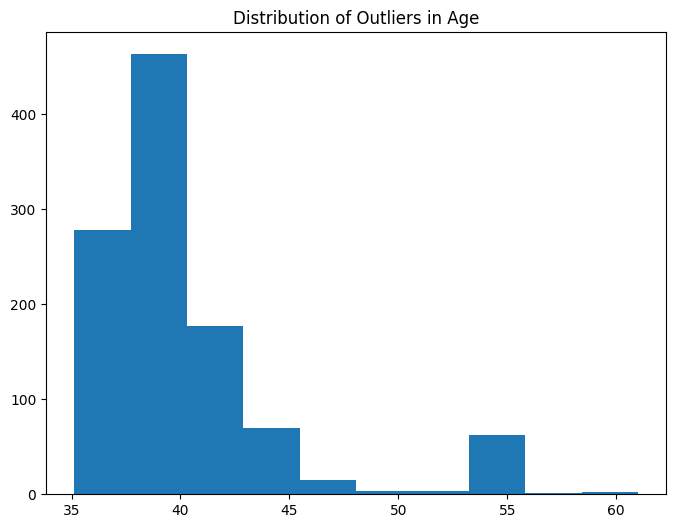

In [8]:
check_outliers('Age', df_train)

<div class="mid">📌 There are too many outliers in the <code>Age</code> feature to delete them. Besides, it would make our model entirely dedicated to young people and that is not the objective of this competition.</div>

<div class="mid">💡 Another thing I noticed is how some <code>Age</code> values are fractions, see for example people younger than 18:</div>

In [9]:
df_train.Age[df_train.Age < 18].value_counts()

Age
17.000000    516
16.000000    109
16.306870     25
17.065445     17
17.673900     15
            ... 
17.684891      1
17.504873      1
17.082867      1
16.441786      1
17.288205      1
Name: count, Length: 92, dtype: int64

<div class="footer">📌 <code>Age</code> values with decimal points should probably be rounded off. This might not be needed if I create Age categories.</div>

<div class="starter" style="border-top: 2px dotted black;"><span style="text-shadow: 0px 0px 5px #96c93b, 0px 0px 10px #96c93b, 0px 0px 10px #96c93b,
    0px 0px 20px #96c93b;"><b>NCP (Number of main meals) distribution</b></span><BR><BR>

As spotted above, <code>NCP</code> distribution analysis is needed. Let's look at the plots:</div>

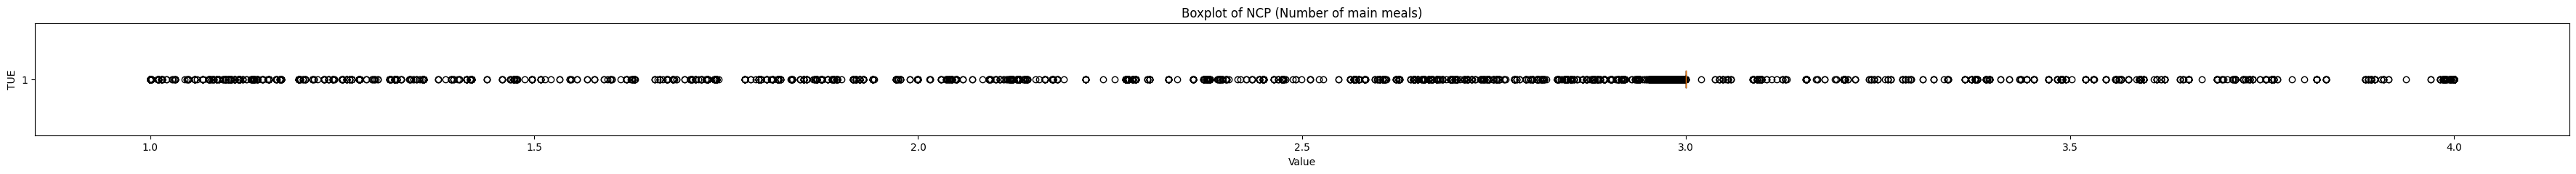

count    20758.000000
mean         2.761332
std          0.705375
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64

NCP
3.000000    0.708450
1.000000    0.095192
4.000000    0.034445
2.993623    0.001879
2.695396    0.001204
              ...   
1.739880    0.000048
2.101841    0.000048
1.788602    0.000048
2.752815    0.000048
1.890682    0.000048
Name: proportion, Length: 689, dtype: float64


In [10]:
plt.figure(figsize=(45, 2))
plt.boxplot(df_train.NCP, vert=False)
plt.title('Boxplot of NCP (Number of main meals)')
plt.xlabel('Value')
plt.ylabel(col)
plt.show()

display(df_train.NCP.describe())
print(df_train.NCP.value_counts(normalize=True))

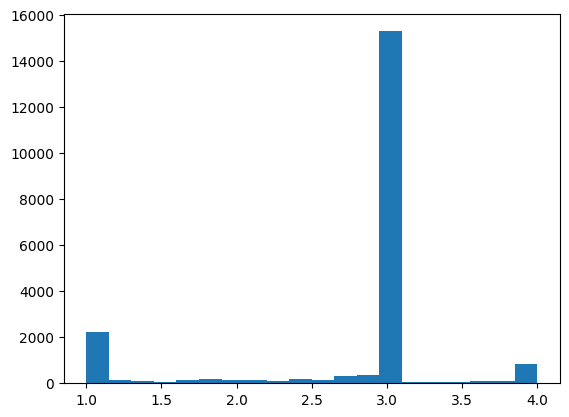

In [11]:
plt.hist(df_train.NCP, bins=20);

<div class="mid">The issue with the distribution of NCP is again, the numbers are not whole. It's odd to eat for example 1 and a half meals a day and I'm curious if this was provided by this health survey takers. I think I need to do two things - 1️⃣ round the decimal points and 2️⃣ check if it looks the same in the original dataset.</div>

In [12]:
# Filter categorical features
categorical_columns = df_train.select_dtypes(include=['object'])

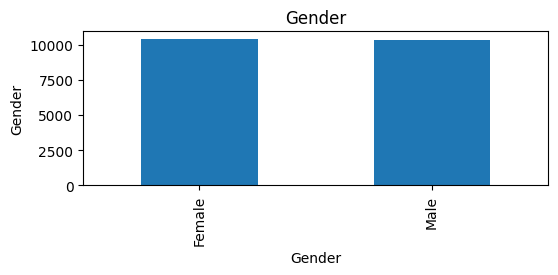

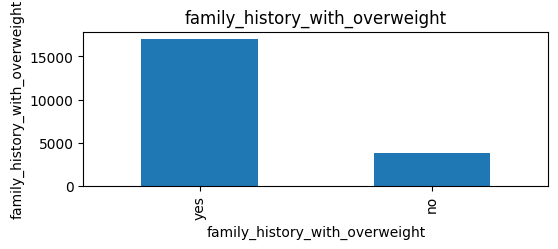

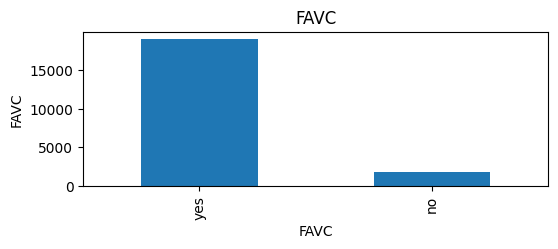

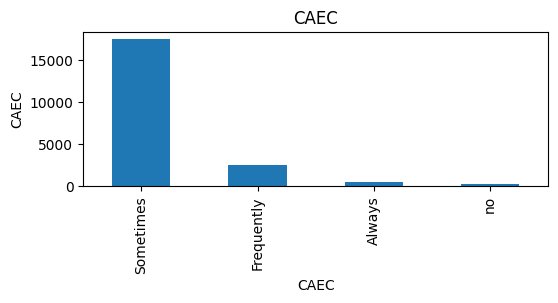

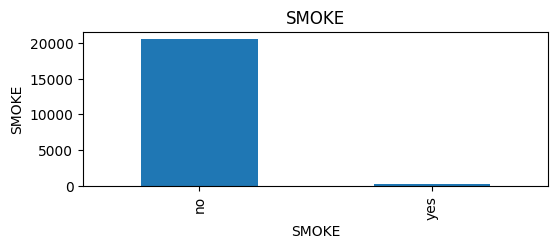

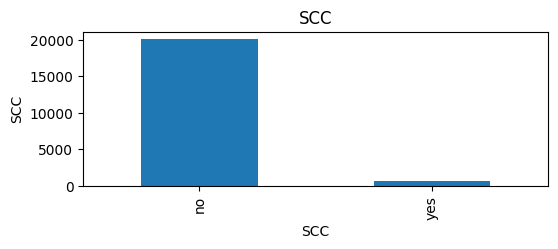

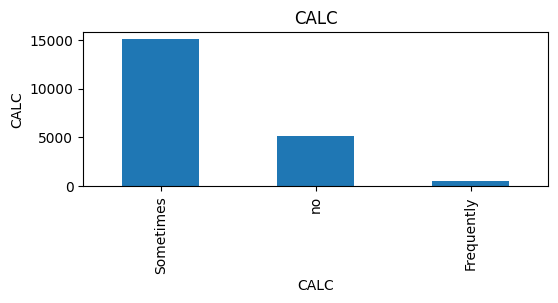

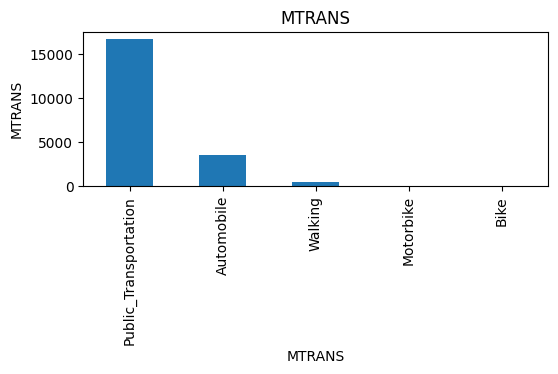

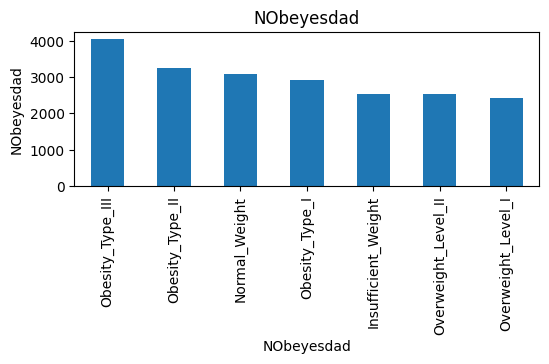

In [13]:
# Create box plots for each feature
for idx, col in enumerate(categorical_columns.columns):
    plt.figure(figsize=(6, 2))
    df_train[col].value_counts().plot.bar()
    plt.title(col)
#     plt.xlabel('Value')
    plt.ylabel(col)
    plt.show()

<div class="green">I don't think there are any outliers within categorical features that needs to be taken care of.</div>

<div class="header2"><span style=""><b>2.3 | Encode categorical features</b></span><BR><BR>

<div class="mid">
    As we've seen from the previous plot, we have in total 9 categorical features, including the target. Out of these, 5 features are binary - simple yes/no answers and Male/Female values for Gender.<BR>
    I will start with the binary yes/no features, simply mapping <code>yes</code> to <code>1</code> and <code>no</code> to <code>0</code>.
</div>

In [14]:
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in binary_cols:
    df_train[col] = df_train[col].map({'yes': 1, 'no': 0})
    
df_train[binary_cols].head()

,family_history_with_overweight,FAVC,SMOKE,SCC
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


<div class="mid">
   Next, let's do a Ranking Transformation which is possible in features CAEC and CALC. Both have values that can be put in order, as in "no" is lower than "sometimes", "frequently" is higher than "sometimes" etc.
</div>

In [15]:
df_train['CAEC'] = df_train['CAEC'].map({
    'no': 0,
    'Always': 3,
    'Frequently': 2,
    'Sometimes': 1
})

df_train['CALC'] = df_train['CALC'].map({
    'no': 0,
    'Frequently': 2,
    'Sometimes': 1
})

df_train[['CAEC', 'CALC']].head()

,CAEC,CALC
0,1,1
1,2,0
2,1,0
3,1,1
4,1,1


<div class="mid">
    As for the <code>Gender</code> feature, I will use one-hot encoding but leave only male presence/absense so the category will be "Is_Female". 
</div>

In [16]:
df_train = pd.get_dummies(df_train, columns=['Gender'], prefix='Is', dtype='int64')
df_train.drop(columns=['Is_Male'], inplace=True)
df_train.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Is_Female
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,Public_Transportation,Overweight_Level_II,0
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,Automobile,Normal_Weight,1
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight,1
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,Public_Transportation,Obesity_Type_III,1
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,Public_Transportation,Overweight_Level_II,0


<div class="mid">
The MTRANS (Transportation used daily) is the tricky one out of categorical features. It might look like ordinal feature but how can we say what should have a higher rank: when a person rides a car, a motorbike or takes public transport? Since this competition emphasizes health, and we know regular movement significantly boosts it, we need a way to capture the movement associated with each transport choice. <BR><BR>
    Therefore, I will group given values to three groups based on the estimated level of physical activity involved:<BR><BR>

&bull; High Movement (2): This category encompasses bike and walking, as these modes directly contribute to daily activity through sustained physical effort.<BR>
&bull; Medium Movement (1): This category includes public transport (bus, train, etc.). I was hesitant about making it a middle category but while not as physically demanding, it almost always involves some movement like walking to stations and I think we can all agree that it involves more movement than getting to your car.<BR>
&bull; Low Movement (0): This category groups car and motorbike. These options generally require minimal physical exertion, contributing the least to daily movement.
</div>

In [17]:
transport_mapping = {
    'Bike': 2,
    'Walking': 2,
    'Public_Transportation': 1,
    'Automobile': 0,
    'Motorbike': 0,
}

df_train['MTRANS'] = df_train['MTRANS'].map(transport_mapping)

# Check the results
print(df_train['MTRANS'].value_counts())
df_train.head()


MTRANS
1    16687
0     3572
2      499
Name: count, dtype: int64


,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Is_Female
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,1,Overweight_Level_II,0
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,0,Normal_Weight,1
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,1,Insufficient_Weight,1
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,1,Obesity_Type_III,1
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,1,Overweight_Level_II,0


<div class="mid">
Last but not least, the target values will be handled using Label Encoding.
</div>

In [18]:
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

le = LabelEncoder()
df_train['NObeyesdad'] = le.fit_transform(df_train['NObeyesdad'].map(target_mapping))

<div class="header2"><span style=""><b>2.4 | Age and NCP odd values</b></span></div>




<div class="mid">
In this paragraph I will further explore the oddity of decimal numbers in values of Age and NCP (Number of meals per day).
I will start by rounding off values of Age and checking how the distribution will look then.
</div>

In [19]:
df_train['Age_rounded'] = df_train['Age'].round()

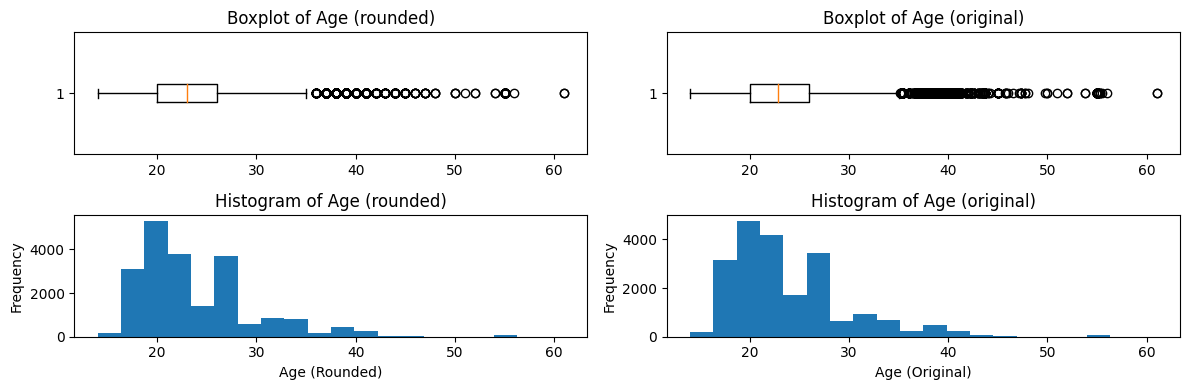

In [20]:
# Comparison plots of Age rounded and original
plt.figure(figsize=(12, 4))

# First row, first column: Boxplot for rounded age
plt.subplot(2, 2, 1)
plt.boxplot(df_train['Age_rounded'], vert=False)
plt.title('Boxplot of Age (rounded)')

# First row, second column: Boxplot for original age
plt.subplot(2, 2, 2)
plt.boxplot(df_train['Age'], vert=False)
plt.title('Boxplot of Age (original)')

# Second row, first column: Histogram for rounded age
plt.subplot(2, 2, 3)
plt.hist(df_train['Age_rounded'], bins=20)
plt.xlabel('Age (Rounded)')
plt.ylabel('Frequency')
plt.title('Histogram of Age (rounded)')

# Second row, second column: Histogram for original age
plt.subplot(2, 2, 4)
plt.hist(df_train['Age'], bins=20)
plt.xlabel('Age (Original)')
plt.ylabel('Frequency')
plt.title('Histogram of Age (original)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

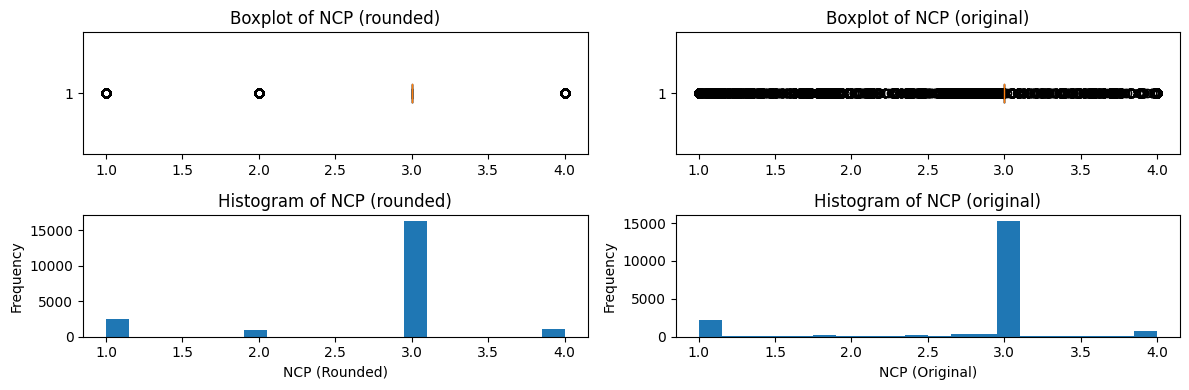

In [21]:
df_train['NCP_rounded'] = df_train['NCP'].round()

# Comparison plots of Age rounded and original
plt.figure(figsize=(12, 4))

# First row, first column: Boxplot for rounded age
plt.subplot(2, 2, 1)
plt.boxplot(df_train['NCP_rounded'], vert=False)
plt.title('Boxplot of NCP (rounded)')

# First row, second column: Boxplot for original age
plt.subplot(2, 2, 2)
plt.boxplot(df_train['NCP'], vert=False)
plt.title('Boxplot of NCP (original)')

# Second row, first column: Histogram for rounded age
plt.subplot(2, 2, 3)
plt.hist(df_train['NCP_rounded'], bins=20)
plt.xlabel('NCP (Rounded)')
plt.ylabel('Frequency')
plt.title('Histogram of NCP (rounded)')

# Second row, second column: Histogram for original age
plt.subplot(2, 2, 4)
plt.hist(df_train['NCP'], bins=20)
plt.xlabel('NCP (Original)')
plt.ylabel('Frequency')
plt.title('Histogram of NCP (original)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

<div class="footer">
In summary, I don't think there is a need to leave the rounded values for Age and NCP. The distributions are almost the same, the boxplots are just more readable. Discarding the original decimal points can potentially remove valuable information. The analysis was needed but I will now remove the newly created columns.</div>

In [22]:
df_train.drop(columns=['NCP_rounded', 'Age_rounded'], inplace=True)

# <b><span style='color: #96c93b'>3 |</span> Feature Engineering</b>

<div class="header2"><span style=""><b>3.1 | BMI</b></span></div>

In [23]:
df_train['BMI'] = df_train['Weight'] / df_train['Height']**2

df_train[['Weight', 'Height', 'BMI']].head()

,Weight,Height,BMI
0,81.669950,1.699998,28.259565
1,57.000000,1.560000,23.422091
2,50.165754,1.711460,17.126706
3,131.274851,1.710730,44.855798
4,93.798055,1.914186,25.599151


<div class="header2"><span style=""><b>3.2 | Dietary diversity</b></span></div>

In [24]:
df_train['Dietary_diversity'] = df_train['FAVC'] + 2 * df_train['FCVC']

<div class="mid">Here, I am calculating Dietary_diversity as sum of FAVC and FCVC but giving FCVC a weight of 2 to emphasize the role of vegetables in balanced diet.</div>

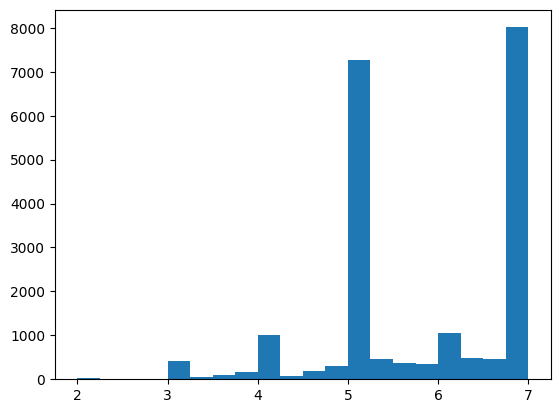

In [25]:
plt.hist(df_train['Dietary_diversity'], bins=20);

<div class="header2"><span style=""><b>3.3 | Total number of meals</b></span></div>

In [26]:
df_train['total_meals'] = df_train['NCP'] + df_train['CAEC']

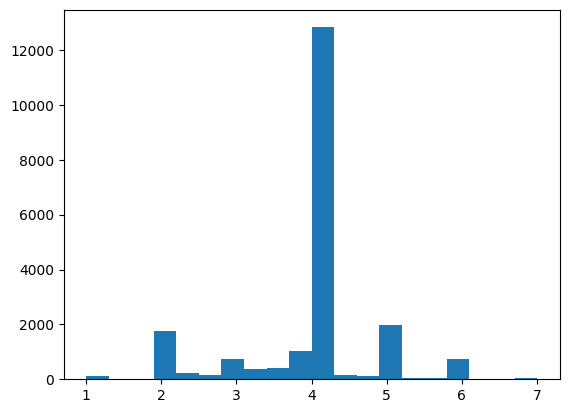

In [27]:
plt.hist(df_train['total_meals'], bins=20);

<div class="header2"><span style=""><b>3.4 | Physical Activity Index</b></span></div>

<div class="mid">For this feature, I will use FAF (Frequency of physical activity, varies from 0 to 3) and the value of MTRANS. I multiply FAF value by 2.</div>

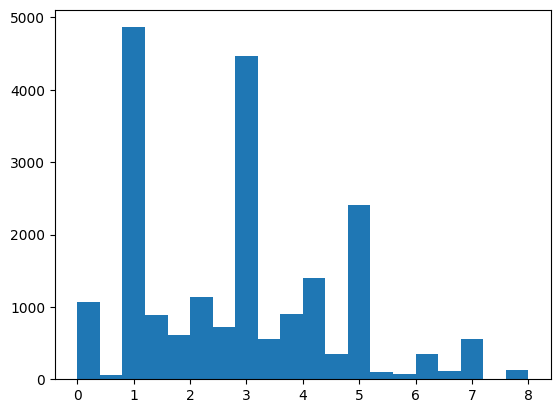

In [28]:
df_train['PAI'] = df_train['FAF'] * 2 + df_train['MTRANS']

plt.hist(df_train['PAI'], bins=20);

<div class="header2"><span style=""><b>3.5 | BMR</b></span></div>

<div class="mid">BMR, Basal Metabolic Rate, is calculated using individuals age, gender, height and weight and activity level. I will use the revised Harris–Benedict equation which is calculated differently for women and men:
<BR><BR>
&bull; Male: (88.4 + 13.4 x weight in kilograms) + (4.8 x height in centimeters) – (5.68 x age)<BR>
&bull; Female: (447.6 + 9.25 x weight in kilograms) + (3.10 x height in centimeters) – (4.33 x age)
    
<BR>The result is an estimated amount of energy in kcal required to maintain the body's basic metabolic activity (without additional activity, so sufficient only for the functioning of the vital organs).
</div>

In [29]:
def calculate_bmr(weight, height, age, is_female):
  """
  Calculates the BMR based on the revised Harris-Benedict equation.

  Args:
    weight: Weight in kilograms.
    height: Height in centimeters.
    age: Age in years.
    is_female: 1 if female, 0 if male.

  Returns:
    The BMR value.
  """
  if is_female:
    return (447.6 + 9.25 * weight) + (3.10 * height * 100) - 4.33 * age
  else:
    return (88.4 + 13.4 * weight) + (4.8 * height * 100) - 5.68 * age

df_train['BMR'] = df_train.apply(
    lambda row: calculate_bmr(row['Weight'], row['Height'], row['Age'], row['Is_Female']), axis=1
)

# Check the results
print(df_train[['Weight', 'Height', 'Age', 'Is_Female', 'BMR']].head())

       Weight    Height        Age  Is_Female          BMR
0   81.669950  1.699998  24.443011          0  1859.940068
1   57.000000  1.560000  18.000000          1  1380.510000
2   50.165754  1.711460  18.000000          1  1364.245825
3  131.274851  1.710730  20.952737          1  2101.493321
4   93.798055  1.914186  31.641081          0  2084.381877


In [30]:
df_train.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,MTRANS,NObeyesdad,Is_Female,BMI,Dietary_diversity,total_meals,PAI,BMR
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0.976473,1,1,3,0,28.259565,5.000000,3.983297,1.000000,1859.940068
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,1.000000,0,0,1,1,23.422091,5.000000,5.000000,2.000000,1380.510000
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,1.673584,0,1,0,1,17.126706,4.761068,2.411685,2.732090,1364.245825
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0.780199,1,1,6,1,44.855798,7.000000,4.000000,3.935726,2101.493321
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0.931721,1,1,3,0,25.599151,6.359328,2.971472,4.935946,2084.381877


<div class="footer">At this point, I'm not sure if the additional features like Total Energy Expenditure or Physical Activity Level are needed. Let's see if the model finds these features sufficient.

# <b><span style='color: #96c93b'>4 |</span> Model Training</b>

In [31]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import RMSprop, Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [32]:
N_CLASSES = df_train['NObeyesdad'].nunique()
N_CLASSES

7

In [33]:
# Set random seed
torch.manual_seed(13)
np.random.seed(13)

In [34]:
EPOCHS = 1000

BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(df_train.drop(['id', 'NObeyesdad'], axis=1).columns)

In [35]:
# Create training and test sets
X = df_train.drop(['id', 'NObeyesdad'], axis=1).values
y = df_train['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [37]:
# Converting From Numpy Array To Torch Tensor
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [38]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [39]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=N_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=21, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=7, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [40]:
def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses):
    print("Begin training.")
    for epoch in range(num_epochs):
        # clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        # forward feed
        output_train = model(X_train.to(device))

        # calculate the loss
        loss_train = criterion(output_train, y_train.to(device))
        
        # backward propagation: calculate gradients
        loss_train.backward()

        # update the weights
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test, y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [41]:
train_losses = np.zeros(EPOCHS)
test_losses  = np.zeros(EPOCHS)

In [42]:
train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, EPOCHS, train_losses, test_losses)

Begin training.
Epoch 50/1000, Train Loss: 0.7574, Test Loss: 0.7639
Epoch 100/1000, Train Loss: 0.4964, Test Loss: 0.5135
Epoch 150/1000, Train Loss: 0.4163, Test Loss: 0.4339
Epoch 200/1000, Train Loss: 0.3804, Test Loss: 0.4001
Epoch 250/1000, Train Loss: 0.3593, Test Loss: 0.4105
Epoch 300/1000, Train Loss: 0.3479, Test Loss: 0.3836
Epoch 350/1000, Train Loss: 0.3372, Test Loss: 0.3794
Epoch 400/1000, Train Loss: 0.3270, Test Loss: 0.3856
Epoch 450/1000, Train Loss: 0.3171, Test Loss: 0.3980
Epoch 500/1000, Train Loss: 0.3168, Test Loss: 0.3856
Epoch 550/1000, Train Loss: 0.3038, Test Loss: 0.3824
Epoch 600/1000, Train Loss: 0.3000, Test Loss: 0.3811
Epoch 650/1000, Train Loss: 0.2935, Test Loss: 0.3836
Epoch 700/1000, Train Loss: 0.2879, Test Loss: 0.3878
Epoch 750/1000, Train Loss: 0.2795, Test Loss: 0.4055
Epoch 800/1000, Train Loss: 0.2746, Test Loss: 0.4131
Epoch 850/1000, Train Loss: 0.2706, Test Loss: 0.3936
Epoch 900/1000, Train Loss: 0.2698, Test Loss: 0.3997
Epoch 950/100

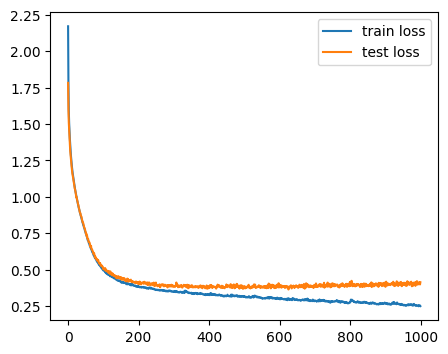

In [43]:
plt.figure(figsize=(5, 4))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [44]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train).to(device)
    predictions_test = model(X_test).to(device)

In [45]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr) != len(original_arr):
        return False
    pred_arr = pred_arr.cpu().numpy()
    original_arr = original_arr.cpu().numpy()
    final_pred = []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [46]:
train_acc = get_accuracy_multiclass(predictions_train, y_train)
test_acc  = get_accuracy_multiclass(predictions_test, y_test)

print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 91.618
Test Accuracy: 87.524


# Predictions on TEST DF

In [47]:
def transform_test():
    global df_test
    
    # Categorical encoding
    for col in binary_cols:
        df_test[col] = df_test[col].map({'yes': 1, 'no': 0})
    df_test['CAEC'] = df_test['CAEC'].map({
    'no': 0,
    'Always': 3,
    'Frequently': 2,
    'Sometimes': 1
})
    # there is an additional category in CALC on TEST
    # not present in the TRAIN DF
    # we need to include it in the mapper
    df_test['CALC'] = df_test['CALC'].map({
        'no': 0,
        'Frequently': 2,
        'Sometimes': 1,
        'Always': 3
})
    df_test = pd.get_dummies(df_test, columns=['Gender'], prefix='Is', dtype='int64')
    df_test.drop(columns=['Is_Male'], inplace=True)
    df_test['MTRANS'] = df_test['MTRANS'].map(transport_mapping)

    # Feature Engineering
    df_test['BMI'] = df_test['Weight'] / df_test['Height']**2
    df_test['Dietary_diversity'] = df_test['FAVC'] + 2 * df_test['FCVC']
    df_test['total_meals'] = df_test['NCP'] + df_test['CAEC']
    df_test['PAI'] = df_test['FAF'] * 2 + df_test['MTRANS']
    df_test['BMR'] = df_test.apply(lambda row: calculate_bmr(row['Weight'], row['Height'], row['Age'], row['Is_Female']), axis=1)
    

    

In [48]:
transform_test()

In [49]:
test_features = df_test.drop(['id'], axis=1).values
test_features = torch.FloatTensor(test_features).to(device)

In [50]:
predictions_final = model(test_features).to(device)

In [51]:
predicted_classes = torch.argmax(predictions_final, dim=1).cpu()

In [52]:
final_output = pd.concat([pd.DataFrame(df_test['id']), pd.DataFrame(predicted_classes)], axis=1)
final_output.rename(columns={0: 'NObeyesdad'}, inplace=True)

final_output.head()

,id,NObeyesdad
0,20758,5
1,20759,2
2,20760,6
3,20761,4
4,20762,6


In [53]:
target_mapping_rev = {target_mapping[k] : k for k in target_mapping}
target_mapping_rev

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Overweight_Level_I',
 3: 'Overweight_Level_II',
 4: 'Obesity_Type_I',
 5: 'Obesity_Type_II',
 6: 'Obesity_Type_III'}

In [54]:
final_output['NObeyesdad'] = final_output['NObeyesdad'].map(target_mapping_rev)

In [55]:
final_output

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [56]:
final_output.to_csv('submission.csv', index=False)